# Exercise 1-2 Linear Regression with Multiple Variables

In [2]:
#necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random,os,sys

In [24]:
#loading the data/
data = np.loadtxt(r'..//data//ex1_2.txt', dtype=np.int32, delimiter=',')
data = pd.DataFrame(data, columns=['size', '#bedroom', 'price'])
data.head(5)

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [25]:
#spliting x, and y variable for feature variable
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
print('X[0] = {}, Y[0] = {}'.format(X[0],Y[0]))
m,n = X.shape
print("#{} Number of training samples, #{} feature per sample".format(m, n))

X[0] = [2104    3], Y[0] = 399900
#47 Number of training samples, #2 feature per sample


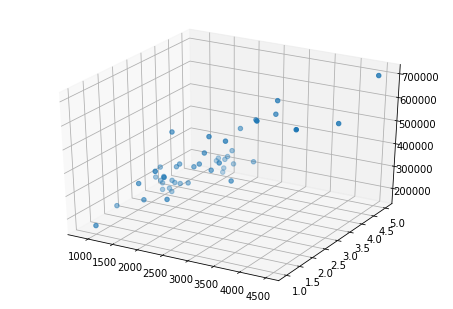

In [26]:
#visualize our datasets

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], Y)

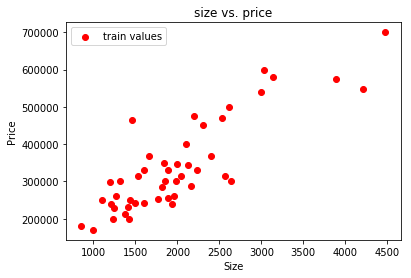

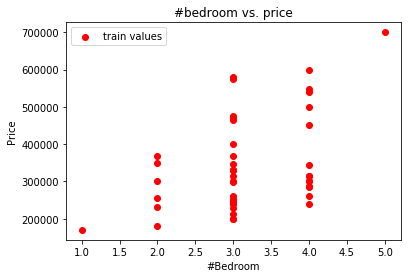

In [27]:
#visualize size vs price
plt.title("size vs. price")
plt.scatter(X[:,0], Y, color='red', label='train values')
plt.xlabel('Size')
plt.ylabel("Price")
plt.legend()
plt.show()


#visualize bedroom vs price
plt.title("#bedroom vs. price")
plt.scatter(X[:,1], Y, color='red', label='train values')
plt.xlabel('#Bedroom')
plt.ylabel("Price")
plt.legend()
plt.show()

## 1. Feature Normalization
By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. For normalization, we do these steps:

Subtract the mean value of each feature from the dataset
After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations
The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature.

Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

For this step, we use sklearn library and StandardScaler to normalize our data.

In [28]:
# Normal equation 
def feature_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    x_norm = (X - mu)/sigma
    return x_norm, mu, sigma

In [29]:
train_X, mu, sigma = feature_normalization(X)
#train_Y, mu, sigma = feature_normalization(Y)

train_X[:5], Y[:5]

(array([[ 0.13000987, -0.22367519],
        [-0.50418984, -0.22367519],
        [ 0.50247636, -0.22367519],
        [-0.73572306, -1.53776691],
        [ 1.25747602,  1.09041654]]),
 array([399900, 329900, 369000, 232000, 539900]))

In [30]:
train_X = np.hstack((np.ones((m,1)), train_X))
train_X[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

# 2. Gradient descent

In [31]:
#choose some alpha values
alpha = 0.05
number_of_itr = 400

#initialize theta with some values 
m, n = train_X.shape
theta = np.zeros(n)
#theta = theta.reshape(n,1)
theta

array([ 0.,  0.,  0.])

In [32]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [33]:
#cost function
def compute_cost_multi(X, Y, theta):
                        
    m = len(Y)
#     diff = X.dot(theta) - Y
#     J = 1/(2*m)*diff.T.dot(diff)
#     return J, diff
    loss = hypothesis(X, theta) - Y
    cost = (1/(2*m))* np.sum(loss ** 2)
    
    return cost, loss
    

In [34]:
#gradient descent
def compute_gradient_descent_mult(X, Y, theta, alpha, number_of_itr):
    #print(X.shape)
    m = len(Y)
    J_history = np.zeros(number_of_itr)
    for i in range(number_of_itr):
#         theta -= (alpha/m)* ((X.dot(theta) - Y).T.dot(X))
#         J_history[i] = compute_cost_multi(X,Y, theta)
 
        cost, loss = compute_cost_multi(X, Y, theta)
        if (i%50 == 0):
            print('Iteration #{} ====== cost = {}\n'.format(i,cost))
        #print("X, loss shape", X, loss.T)
        gradient = np.dot(loss,X)
        theta = theta - alpha * (gradient/m)
        J_history[i] = cost
        
    return theta, J_history

In [35]:
#run gradient descent with given parameters
theta, J_history = compute_gradient_descent_mult(train_X, Y, theta, alpha, number_of_itr)

Iteration #0 ====== cost = 65591548106.45744

Iteration #50 ====== cost = 2555717860.3347855

Iteration #100 ====== cost = 2064354185.0822668

Iteration #150 ====== cost = 2045451422.7504501

Iteration #200 ====== cost = 2043524981.7652078

Iteration #250 ====== cost = 2043307817.0062354

Iteration #300 ====== cost = 2043283199.138533

Iteration #350 ====== cost = 2043280407.631865



In [36]:
theta

array([ 340412.65915621,  110621.35463015,   -6639.77862212])

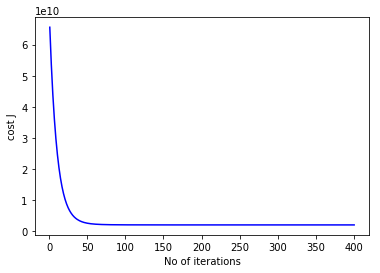

In [37]:
#plot the graph

plt.plot(range(1, number_of_itr+1), J_history, color='b')
plt.xlabel("No of iterations")
plt.ylabel("cost J")
plt.show()

In [38]:
#Theta computed from gradient descent
print(theta)

[ 340412.65915621  110621.35463015   -6639.77862212]


### prediction

In [39]:
##Estimate the price of a 1650 sq-ft, 3 br house:
norm_test_x = ((np.asarray([1650,3]) - mu )/ sigma)
norm_test_x = np.hstack((np.ones((1)), norm_test_x))

price = norm_test_x.dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

Predicted price of a 1650 sq-ft, 3 br house: 293083.573671


# Selecting Learning Rates (alpha)

In [48]:
alpha_rates = [0.01,0.03,0.1,0.3,1,2,3]
for i in range(len(alpha_rates)):
    theta = np.zeros(n)
    #theta = theta.reshape(n,1) # make sure theta not updated and it is always zero before new train
    print('################################################################################')
    print('Training with alpha = {}\n'.format(alpha_rates[i]))
    #gradient_descent(train_X,Y,theta,alpha = alpha_rates[i],number_of_itr+1)
    compute_gradient_descent_mult(train_X, Y, theta, alpha_rates[i], number_of_itr)
    
    print('#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*')

################################################################################
Training with alpha = 0.01

Iteration #0 ====== cost = 65591548106.45744

Iteration #50 ====== cost = 25099179837.571247

Iteration #100 ====== cost = 10621009943.60025

Iteration #150 ====== cost = 5331273810.417717

Iteration #200 ====== cost = 3355603476.448817

Iteration #250 ====== cost = 2596989638.416711

Iteration #300 ====== cost = 2294175518.5893803

Iteration #350 ====== cost = 2166557054.9440894

#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
################################################################################
Training with alpha = 0.03

Iteration #0 ====== cost = 65591548106.45744

Iteration #50 ====== cost = 5239888073.234378

Iteration #100 ====== cost = 2284546488.081254

Iteration #150 ====== cost = 2079451804.812748

Iteration #200 ====== cost = 2051731982.6974237

Iteration #250 ====== cost = 2045515854.2480078

Iteration 

C:\Users\rajeev\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


In [57]:
#best learning rate is 0.03
theta = np.zeros(3)
theta,_= compute_gradient_descent_mult(train_X, Y, theta, 0.03, number_of_itr)

Iteration #0 ====== cost = 65591548106.45744

Iteration #50 ====== cost = 5239888073.234378

Iteration #100 ====== cost = 2284546488.081254

Iteration #150 ====== cost = 2079451804.812748

Iteration #200 ====== cost = 2051731982.6974237

Iteration #250 ====== cost = 2045515854.2480078

Iteration #300 ====== cost = 2043885948.1516323

Iteration #350 ====== cost = 2043444955.2784207



In [58]:
theta

array([ 340410.91897274,  110308.11337059,   -6326.5381075 ])

In [59]:
#predictions
##Estimate the price of a 1650 sq-ft, 3 br house:
norm_test_x = ((np.asarray([1650,3]) - mu )/ sigma)
norm_test_x = np.hstack((np.ones((1)), norm_test_x))

price = norm_test_x.dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

Predicted price of a 1650 sq-ft, 3 br house: 293149.994329


## 3. Normal Equations
In this part, we will math out the parameter theta by using normal equation.

We use the same data as the gradient descent method.

In [61]:
data = np.loadtxt(open(r'..//data//ex1_2.txt', "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))
X.shape, y.shape

((47, 3), (47,))

In [62]:
def normal_eqn(X, y):
    """
    Computes the closed-form solution to linear regression.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.

    Returns
    -------
    theta : ndarray, shape (n_features,)
        The closed-form solution to linear regression using the normal equations.
    """
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [64]:
theta = normal_eqn(X, y)
print('Theta computed from the normal equations: ')
print(theta)

Theta computed from the normal equations: 
[ 89597.90954361    139.21067402  -8738.01911255]


##### Estimate the price of a 1650 sq-ft, 3 br house:

In [65]:
price = np.array([1, 1650, 3]).dot(theta)
print( 'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464335
